Let's try to make a notebook that looks at the PSF.

In [1]:
from lsst.daf.persistence import Butler

In [2]:
butler = Butler('/project/shared/data/Twinkles_subset/output_data_v2/')

In [3]:
subset = butler.subset('calexp', filter='i')

In [4]:
dataId = subset.cache[6]

In [5]:
my_calexp = butler.get('calexp', **dataId)

In [6]:
psf = my_calexp.getPsf()

In [7]:
shape = psf.computeShape()

In [8]:
shape.getDeterminantRadius()

2.650111999169302

In [9]:
from lsst.geom import Point2D
point = Point2D(50.1, 160.2)

In [10]:
shape = psf.computeShape(point)

In [11]:
shape.getDeterminantRadius()

2.6500495193183045

In [12]:
shapes = []
for x in range(100):
    for y in range(100):
        point = Point2D(x*40., y*40.)
        shapes.append(psf.computeShape(point).getDeterminantRadius())

In [13]:
from matplotlib import pylab as plt

(array([3879., 1679., 1000.,  831.,  718.,  644.,  585.,  399.,  197.,
          68.]),
 array([2.64647811, 2.64928225, 2.65208638, 2.65489051, 2.65769464,
        2.66049878, 2.66330291, 2.66610704, 2.66891118, 2.67171531,
        2.67451944]),
 <a list of 10 Patch objects>)

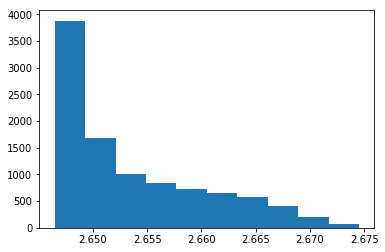

In [14]:
plt.hist(shapes)

In [15]:
src = butler.get('src', **dataId)

In [16]:
import numpy
star_idx = numpy.where(src.get('base_ClassificationExtendedness_value') == 0)

In [17]:
import math
star_shapes = []
psf_shapes = []
for x, y in zip(src.getX()[star_idx[0]], src.getY()[star_idx[0]]):
    point = Point2D(x, y)
    psf_shapes.append(psf.computeShape(point).getDeterminantRadius())
for xx, yy in zip(src.get('base_SdssShape_psf_xx')[star_idx[0]], src.get('base_SdssShape_psf_yy')[star_idx[0]]):
    star_shapes.append(math.sqrt(xx + yy))
star_shapes = numpy.array(star_shapes)
psf_shapes = numpy.array(psf_shapes)

In [18]:
good_star_idx = numpy.where(numpy.isfinite(star_shapes))[0]

(array([197., 116.,  48.,  40.,  42.,  31.,  34.,  23.,  11.,  11.]),
 array([2.64647888, 2.64905415, 2.65162942, 2.65420469, 2.65677996,
        2.65935523, 2.6619305 , 2.66450577, 2.66708104, 2.66965631,
        2.67223158]),
 <a list of 10 Patch objects>)

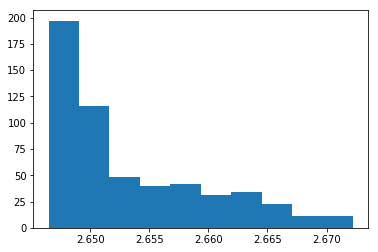

In [19]:
plt.hist(psf_shapes[good_star_idx])

(array([192., 120.,  52.,  39.,  42.,  31.,  37.,  17.,  12.,  11.]),
 array([3.74783312, 3.75138452, 3.75493593, 3.75848733, 3.76203873,
        3.76559014, 3.76914154, 3.77269294, 3.77624434, 3.77979575,
        3.78334715]),
 <a list of 10 Patch objects>)

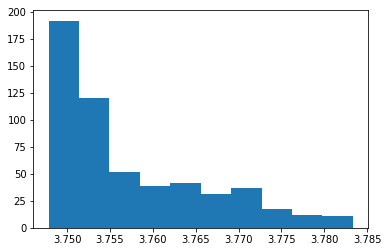

In [20]:
plt.hist(star_shapes[good_star_idx])

(1.00075, 1.00175)

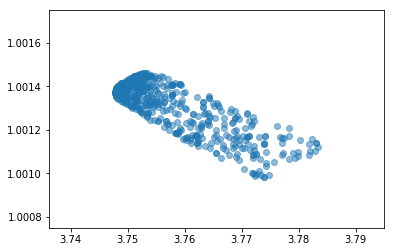

In [21]:
plt.scatter(star_shapes[good_star_idx], star_shapes[good_star_idx]/psf_shapes[good_star_idx]*(math.sqrt(2)/2), alpha=0.5)
plt.ylim(1.00075, 1.00175)